In [1]:
import os
import sys
import pandas as pd
from os.path import expanduser


#!{sys.executable} -m pip install git+https://gitlab.sd2e.org/sd2program/test-harness.git@add-sparse-col-code-for-untested-data
        
from  pysd2cat.analysis import od_predictor

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
df1 = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv'), index_col=0)
df1

,SynBioHub URI,Unnamed: 0.1,calibration_id,experiment_id,filename,glycerol_plate_index,glycerol_stock,growth_media_1,growth_media_2,id,inc_temp,inc_time_1,inc_time_2,input,lab,lab_id,media,od,od_cutoff,output,part_1_id,part_2_id,plate_id,post_gfp_raw,post_od_corrected,post_od_raw,post_well,pre_gfp_raw,pre_od_corrected,pre_od_raw,pre_well,replicate,source_container,strain,strain_circuit,well
0,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,0.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_A1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_A1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,38609.608564,3.568378,1.051520,a1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,a1
1,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,1.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_B1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_B1,warm_30,16:hour,16:hour,0,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37298.042023,1.414785,0.416905,b1,39829.311835,4.982175,1.468134,e8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,XNOR,b1
2,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,2.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_C1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_C1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39886.498815,4.650828,1.370494,c1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,c1
3,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,3.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_D1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_D1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37675.399501,2.494735,0.735142,d1,37890.338105,3.335819,0.982990,d7,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,XOR,d1
4,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,4.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_E1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_E1,warm_30,16:hour,16:hour,11,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39326.071961,3.918860,1.154799,e1,40845.469102,5.142327,1.515328,b8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,XOR,e1
5,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,5.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_F1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_F1,warm_30,16:hour,16:hour,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37672.277802,2.659247,0.783620,f1,40162.160129,4.666875,1.375223,c3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,AND,f1
6,https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1,6.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_G1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_G1,warm_30,16:hour,16:hour,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39718.756729,4.994909,1.471887,g1,40516.098534,4.833329,1.424273,a8,0.0,c

In [4]:
df = df1.loc[(df1['growth_media_1'] == 'standard_media') & (df1['inc_time_2'] == '12:hour') & (df1['inc_temp'] == 'warm_30')]

In [5]:
df['growth_media_1'].unique()

array(['standard_media'], dtype=object)

In [6]:
od_predictor.predict(df)

/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


['glycerol_stock', 'growth_media_1', 'growth_media_2', 'inc_temp', 'inc_time_1', 'inc_time_2', 'post_well', 'pre_well', 'source_container', 'SynBioHub URI', 'od', 'post_gfp_raw', 'pre_gfp_raw', 'pre_od_raw']
initializing TestHarness object with output_location equal to /Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/pysd2cat/notebooks

▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 13:09:07
Normalizing training and testing splits...
{'02-05-2019-1'}
{'02-05-2019-1'}
set()
{'02-05-2019-1'}
{'standard_media'}
{'standard_media'}
set()
{'standard_media'}
{'standard_media'}
{'standard_media'}
set()
{'standard_media'}
{'warm_30'}
{'warm_30'}
set()
{'warm_30'}
{'18:hour'}
{'18:hour'}
set()
{'18:hour'}
{'12:hour'}
{'12:hour'}
set()
{'12:hour'}
{'g10', 'e10', 'f6', 'd3', 'h7', 'c3', 'f11', 'f8', 'a4', 'f1', 'g9', 'h2', 'h4', 'a10', 'g1', 'd4', 'f10', 'a5', 'h11', 'c8', 'c1', 'c10', 'h1',

In [97]:
predictions = pd.read_csv("test_harness_results/runs/run_Qor8XG9yAyZXo/predicted_data.csv")
predictions

,id,post_od_raw,strain,od_predictions,od_rankings
0,782,0.978952,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,0.005000,355
1,930,1.631798,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,0.005000,202
2,492,0.764207,https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1,0.005000,623
3,791,0.763013,https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1,0.005000,639
4,793,1.248303,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,0.005000,486
5,658,0.044045,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,0.005000,452
6,991,1.552179,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,0.005000,746
7,680,0.188535,https://hub.sd2e.org/user/sd2e/design/UWBF_8231/1,0.005000,1043
8,882,1.610487,https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1,0.005000,286
9,744,1.216761,https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1,0.005000,1000


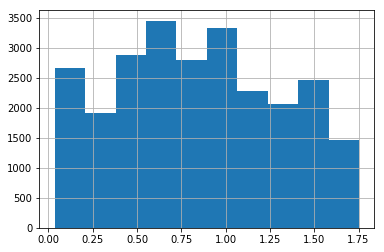

In [51]:
predictions['post_od_raw'].hist()

In [102]:
import math

target = 0.1

predictions['distance'] = predictions.apply(lambda x: abs(x['post_od_raw'] - target), axis=1)
predictions.sort_values(['distance'])


,id,post_od_raw,strain,od_predictions,od_rankings,distance
24461,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,0.000178,190,0.000730
19730,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1,0.000348,848,0.000730
14101,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1,0.000416,439,0.000730
18599,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_8543/1,0.000357,208,0.000730
18219,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1,0.000362,916,0.000730
23745,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,0.000215,320,0.000730
4139,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1,0.001214,7,0.000730
23714,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_7376/1,0.000217,886,0.000730
23694,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,0.000219,724,0.000730
24790,628,0.099270,https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1,0.000134,282,0.000730


In [103]:
#selections = predictions.groupby(['strain']).agg({'distance' : [min], 
#                                                  'od_predictions' : ['first']})  
#selections = selections.reset_index()
selections = predictions.loc[predictions.groupby('strain')['distance'].idxmin()]
#selections.columns = ['_'.join(col).strip() for col in selections.columns.values]
#selections = selections.drop(columns=['distance_min']).rename(columns={'od_predictions_first' : 'od'}).reset_index()
selections.to_csv('strain_inoculation_od.csv')
selections.set_index('strain').to_dict()['od_predictions']
#selections


{'https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1': 0.00033079820992085667,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1': 0.00041622326770561767,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1': 0.00021519488794030192,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1': 0.00013404778654405424,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1': 0.00017774717819479284,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1': 0.0007882741558025219,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1': 0.0002771638771330948,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6388/1': 0.0003349517637406792,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6389/1': 0.00013017646104013648,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1': 4.629865865425921e-05,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1': 0.0012135691580289695,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1': 0.00036222673623033337,
 'https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1': 0.000315632

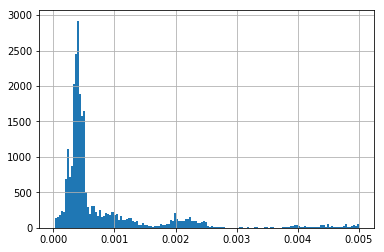

In [62]:
predictions['od_predictions'].hist(bins=150)

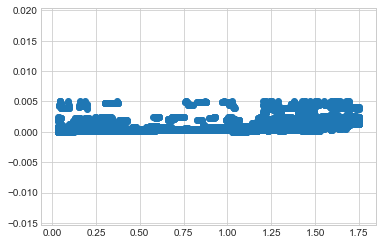

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.scatter(predictions['post_od_raw'], predictions['od_predictions']);

In [26]:
%%HTML
<iframe width="100%" height="800" src="./test_harness_results/custom_regression_leaderboard.html"></iframe>